In [1]:
import numpy as np
from scipy import stats
import glob
import os
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
step_threshold = 20
datapath="plots/cramer_otgan_cosmo_primary_256_200k_batchSize384_solverADAM_learningRate_0.001_nUp2_priorDistuniform_sinkhornLambda0.002_flipLabel0.01_nd4_ng4_gfdim32_dfdim32_zdim64_nodes81_rank0"
filenames=sorted(glob.glob(os.path.join(datapath,"step*_epoch*")))
print(filenames)

['plots/cramer_otgan_cosmo_primary_256_200k_batchSize384_solverADAM_learningRate_0.001_nUp2_priorDistuniform_sinkhornLambda0.002_flipLabel0.01_nd4_ng4_gfdim32_dfdim32_zdim64_nodes81_rank0/step100_epoch7', 'plots/cramer_otgan_cosmo_primary_256_200k_batchSize384_solverADAM_learningRate_0.001_nUp2_priorDistuniform_sinkhornLambda0.002_flipLabel0.01_nd4_ng4_gfdim32_dfdim32_zdim64_nodes81_rank0/step10_epoch0', 'plots/cramer_otgan_cosmo_primary_256_200k_batchSize384_solverADAM_learningRate_0.001_nUp2_priorDistuniform_sinkhornLambda0.002_flipLabel0.01_nd4_ng4_gfdim32_dfdim32_zdim64_nodes81_rank0/step110_epoch8', 'plots/cramer_otgan_cosmo_primary_256_200k_batchSize384_solverADAM_learningRate_0.001_nUp2_priorDistuniform_sinkhornLambda0.002_flipLabel0.01_nd4_ng4_gfdim32_dfdim32_zdim64_nodes81_rank0/step20_epoch1', 'plots/cramer_otgan_cosmo_primary_256_200k_batchSize384_solverADAM_learningRate_0.001_nUp2_priorDistuniform_sinkhornLambda0.002_flipLabel0.01_nd4_ng4_gfdim32_dfdim32_zdim64_nodes81_rank

# Generate Histogram Plot

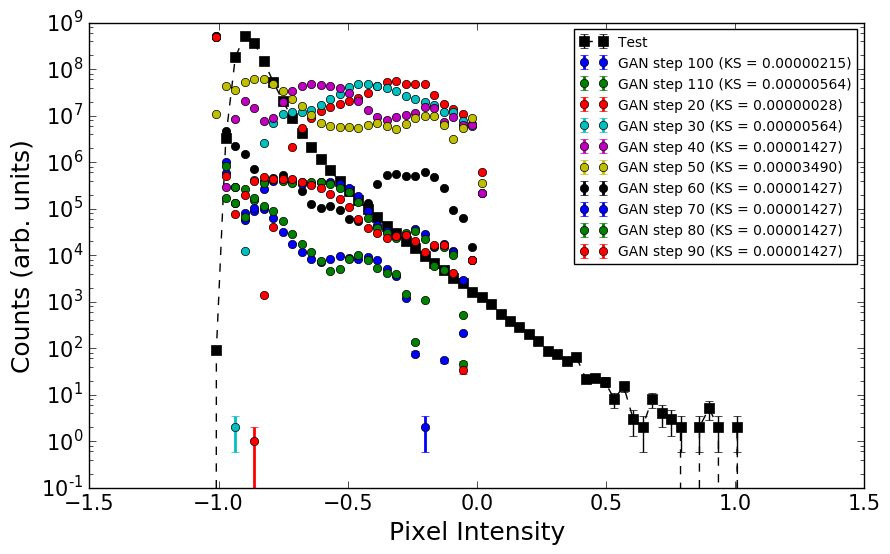

In [3]:
#set up plot
fig, ax = plt.subplots(figsize=(10,6))

#get arrays from file
for idx,fname in enumerate(filenames):
    data = np.load(os.path.join(fname,"pixel_intensity.npz"))
    
    #extract fields
    test_bins = data["test_bins"]
    test_hist = data["test_hist"]
    test_err = np.sqrt(test_hist)
    fake_bins = data["fake_bins"]
    fake_hist = data["fake_hist"]
    fake_err = np.sqrt(fake_hist)

    #KS test
    ks_test = stats.ks_2samp(test_hist, fake_hist)[1]
    
    #plot test
    if idx==0:
        ax.errorbar(test_bins, test_hist, yerr=test_err, fmt='--ks', label='Test', markersize=7)

    step = int(re.findall("step(\d{1,})\_",fname)[0])
    if step < step_threshold:
        continue
        
    # plot generated
    fake_label = 'GAN step '+str(step)+' (KS = {:0.8f})'.format(ks_test)
    ax.errorbar(fake_bins, fake_hist, yerr=fake_err, fmt='o', label=fake_label, linewidth=2, markersize=6);

ax.legend(loc="upper right", fontsize=10)
ax.set_yscale('log');
ax.set_xlabel('Pixel Intensity', fontsize=18)
ax.set_ylabel('Counts (arb. units)', fontsize=18)
ax.set_xlim((-1.5,1.5))
plt.tick_params(axis='both', labelsize=15, length=5)
plt.tick_params(axis='both', which='minor', length=3)
#plt.title('Pixels distribution (KS=%2.3f)'%ks_test, fontsize=16);

# Generate Images Plot

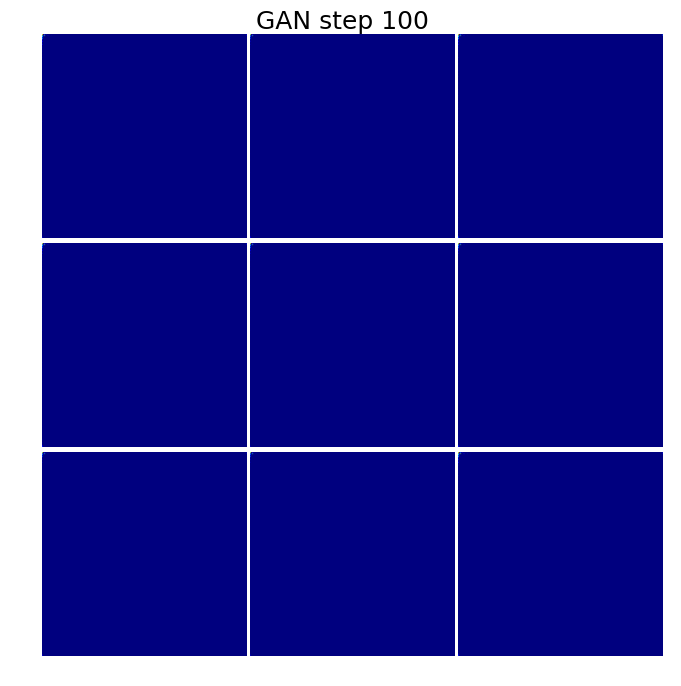

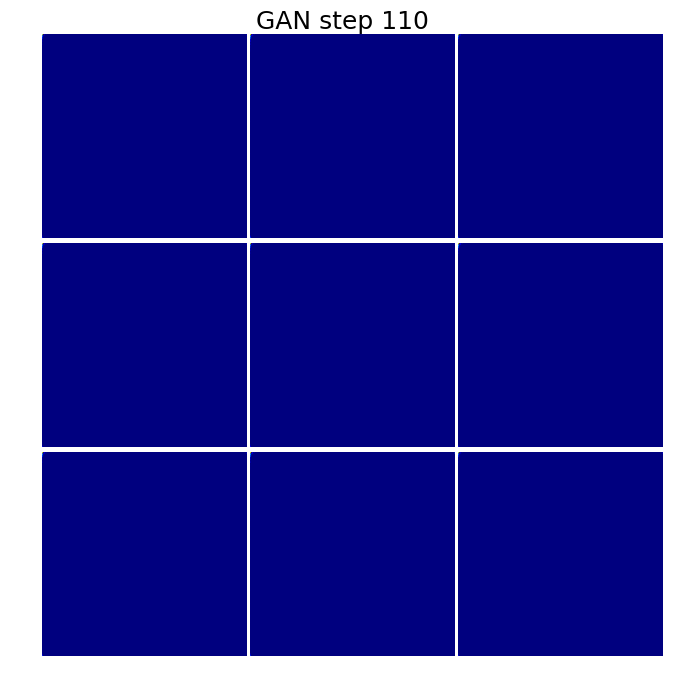

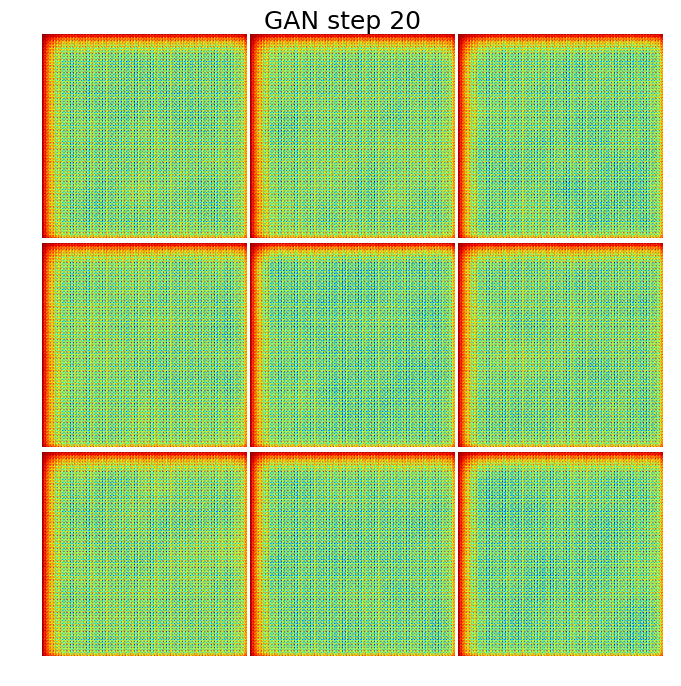

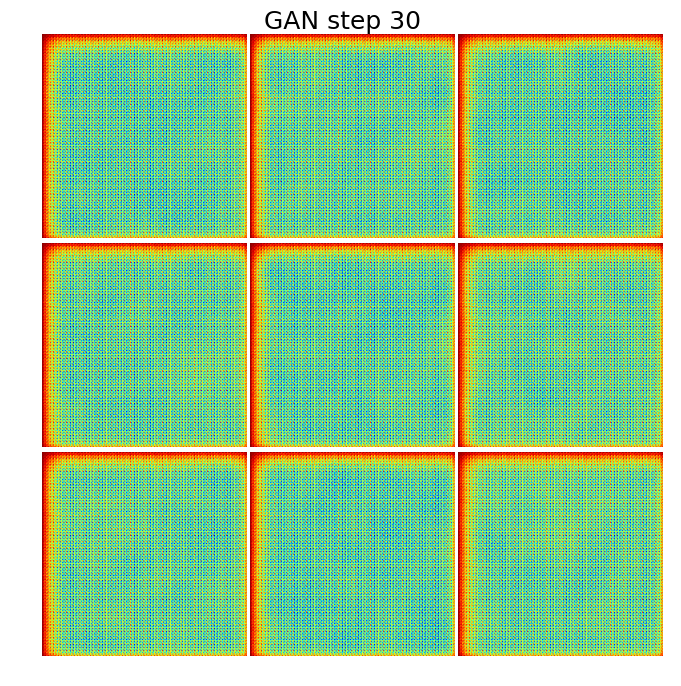

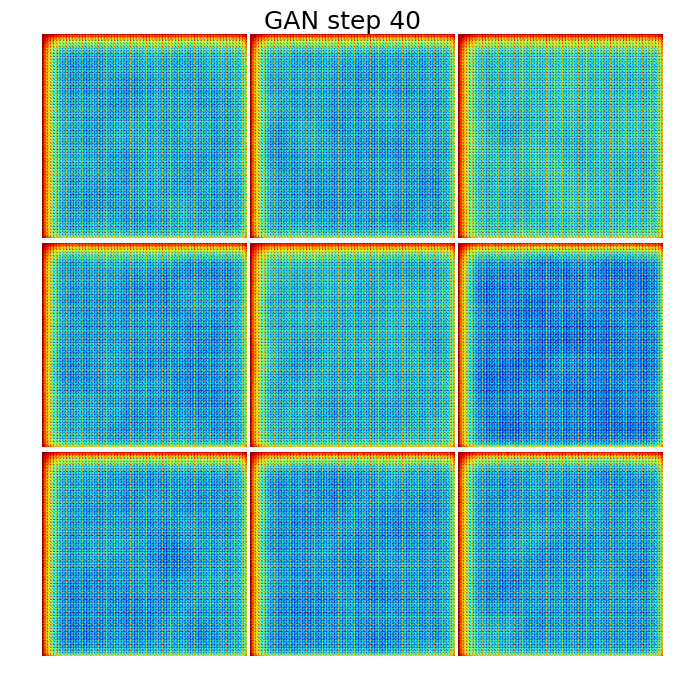

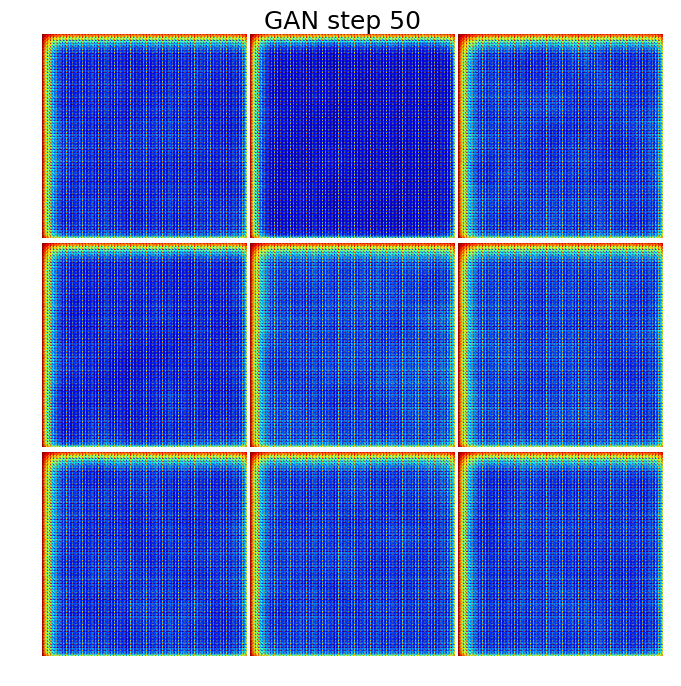

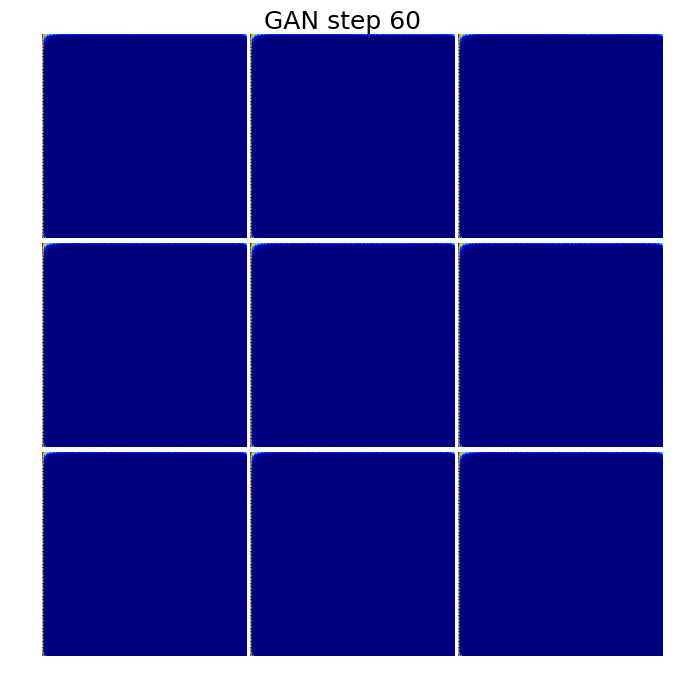

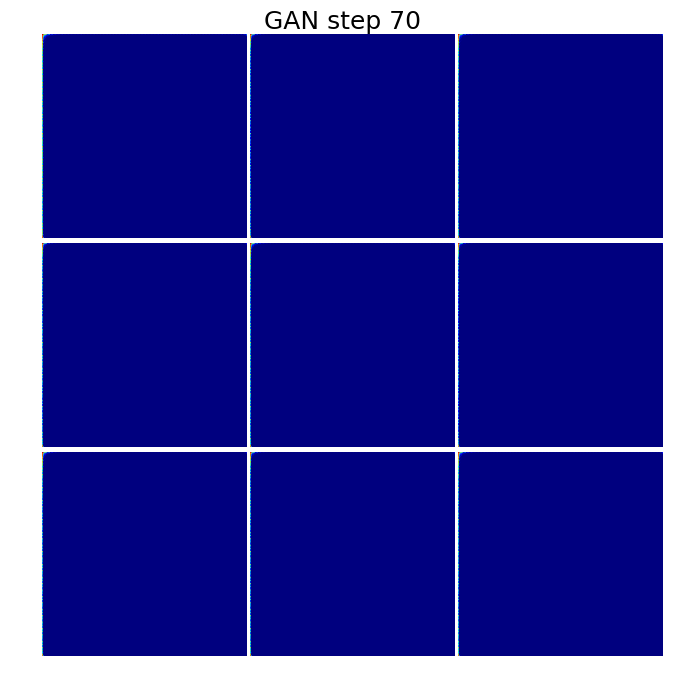

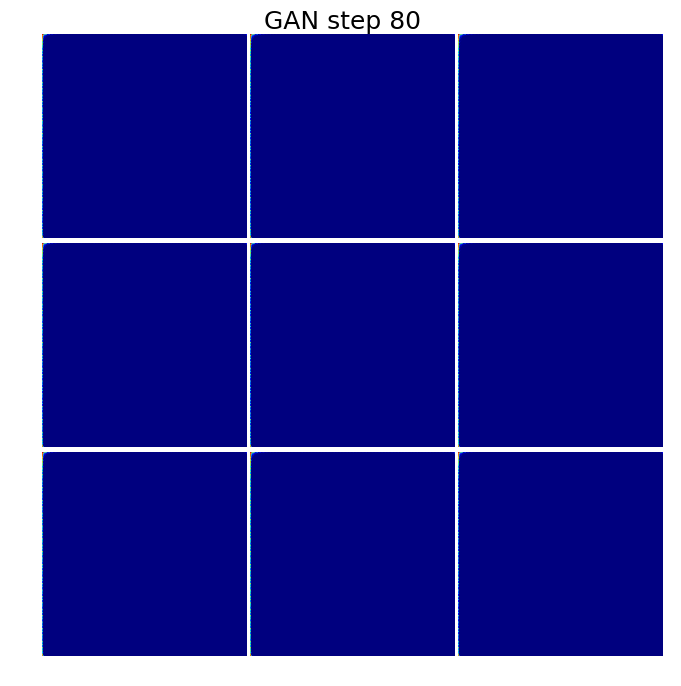

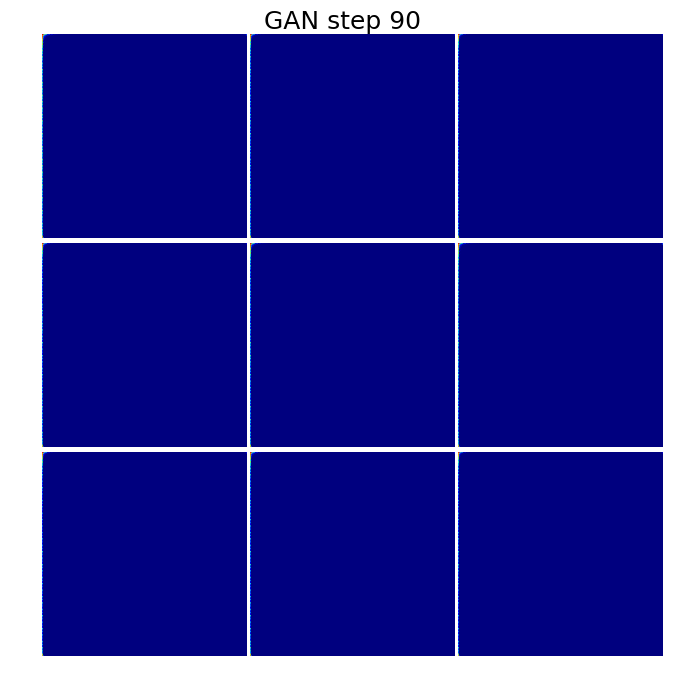

In [4]:
#get arrays from file
for idx,fname in enumerate(filenames):
    data = np.load(os.path.join(fname,"fake_images.npz"))
    
    #determine step
    step = int(re.findall("step(\d{1,})\_",fname)[0])
    if step < step_threshold:
        continue
    
    #extract image
    arr = np.asarray(data['image_0'])
    images=np.zeros((9,arr.shape[0],arr.shape[1]))
    images[0,:,:] = arr[...]
    for im in range(1,9):
        arr = np.asarray(data['image_'+str(im)])
        images[im,:,:] = arr[...]

    # save figures
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,7.6), 
                           gridspec_kw={'wspace':0.02, 'hspace':0.00})
    for i,a in enumerate(ax.flatten()):
        a.imshow(images[i,:,:])
        a.axis("off")
    
    #plot
    fig.suptitle("GAN step "+str(step), fontsize=18)
    fig.subplots_adjust(top=0.95)